# Implied volatity prediction 

In [58]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data 

In [5]:
!ls ../data/spots_iv_index_spx_ai_daily

spots_iv_index_spx_ai_daily.xlsx   spots_iv_index_sx5e_ai_daily.xlsx
spots_iv_index_spx_ai_weekly.xlsx  spots_iv_index_sx5e_ai_weekly.xlsx


### spots_iv_index_spx_ai_daily

In [ ]:
from implied_vol_prediction.src.data import open_and_transform_csv

spots_iv_index_spx_ai_daily = open_and_transform_csv(r'../data/spots_iv_index_spx_ai_daily.xlsx')

In [37]:
spots_iv_index_spx_ai_daily.isnull().sum()

Dates               0
Spot t              0
Spot t-1            0
Implied_vol         0
Duration            0
Strike              0
Real_implied_vol    0
dtype: int64

In [38]:
spots_iv_index_spx_ai_daily.head()

,Dates,Spot t,Spot t-1,Implied_vol,Duration,Strike,Real_implied_vol
0,2019-04-18,2900.45,2900.45,40.2755,6M,30,10.216200
1,2019-04-17,2900.45,2907.06,38.8159,6M,30,10.158454
2,2019-04-16,2907.06,2905.58,38.4960,6M,30,10.037197
3,2019-04-15,2905.58,2907.41,38.0417,6M,30,10.041465
4,2019-04-12,2907.41,2888.32,38.5535,6M,30,10.095491


### spots_iv_index_spx_ai_weekly

In [39]:
spots_iv_index_spx_ai_weekly = open_and_transform_csv(r'../data/spots_iv_index_spx_ai_weekly.xlsx')

In [41]:
spots_iv_index_spx_ai_weekly.isnull().sum()

Dates               0
Spot t              0
Spot t-5            0
Implied_vol         0
Duration            0
Strike              0
Real_implied_vol    0
dtype: int64

In [42]:
spots_iv_index_spx_ai_weekly.head()

,Dates,Spot t,Spot t-5,Implied_vol,Duration,Strike,Real_implied_vol
0,2019-04-18,2900.45,2888.32,40.2755,6M,30,10.203087
1,2019-04-17,2900.45,2888.21,38.8159,6M,30,10.156590
2,2019-04-16,2907.06,2878.20,38.4960,6M,30,10.029737
3,2019-04-15,2905.58,2895.77,38.0417,6M,30,10.044230
4,2019-04-12,2907.41,2892.74,38.5535,6M,30,10.096257


## EDA with spots_iv_index_spx - daily 

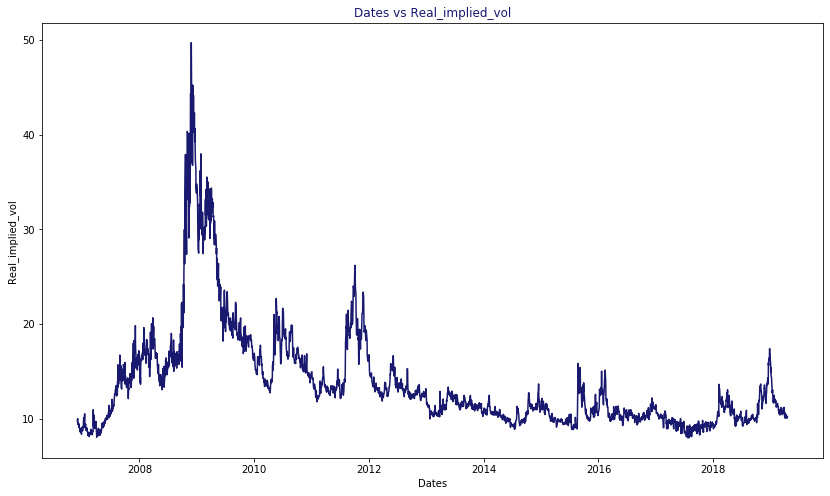

In [196]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "6M", 30, "Dates", "Real_implied_vol")

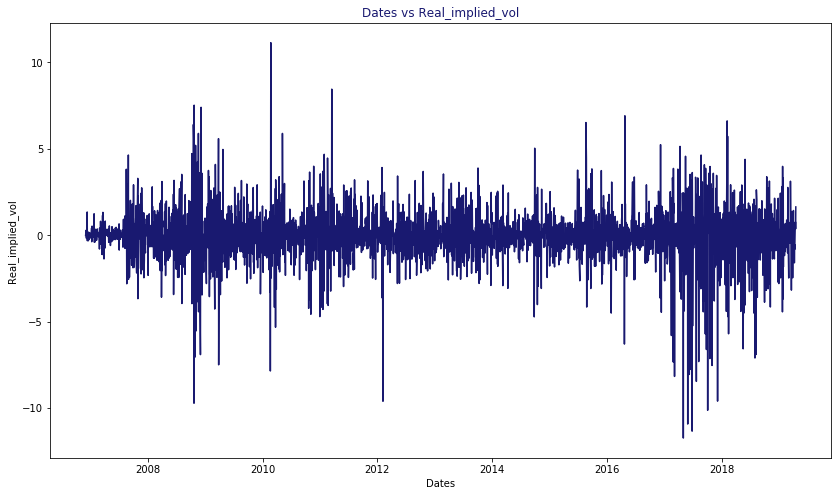

In [197]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "6M", 40, "Dates", "Real_implied_vol")

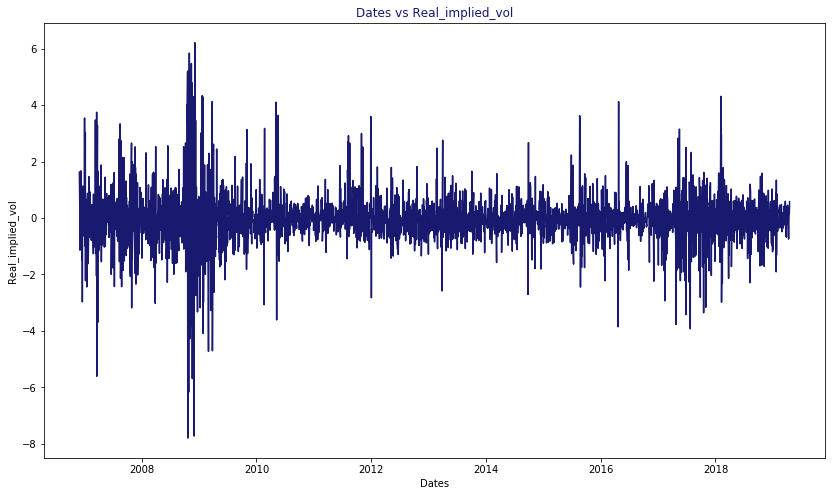

In [186]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "6M", 60, "Dates", "Real_implied_vol")

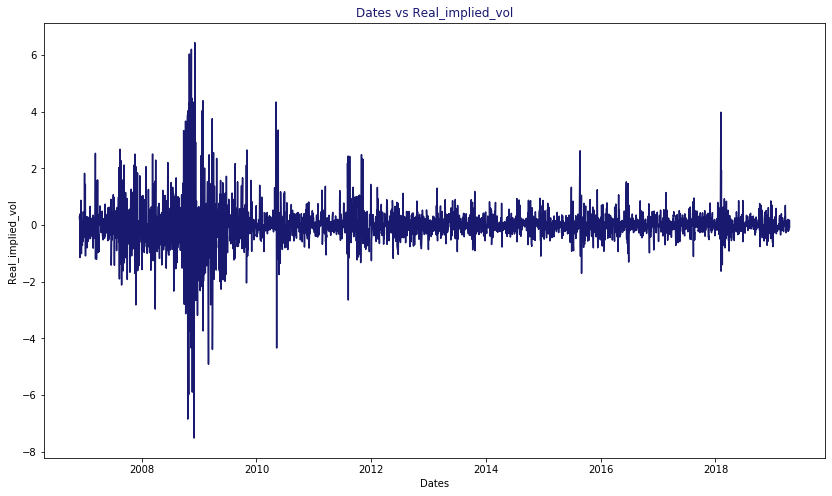

In [188]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "6M", 80, "Dates", "Real_implied_vol")

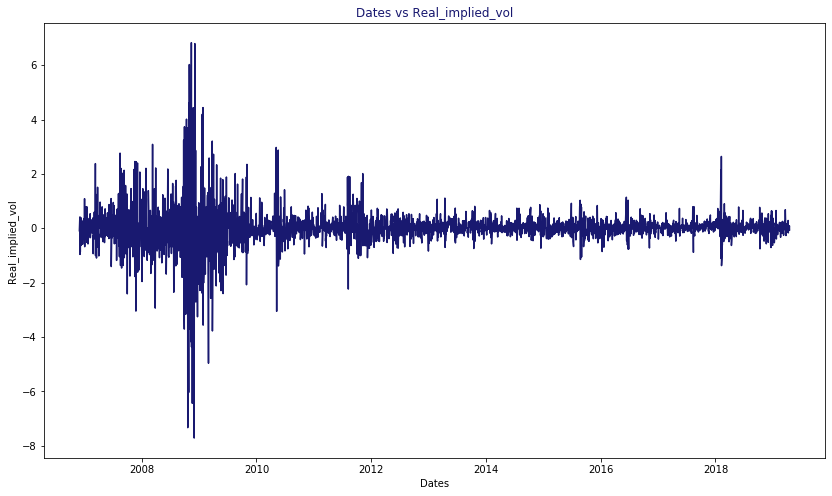

In [189]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "6M", 100, "Dates", "Real_implied_vol")

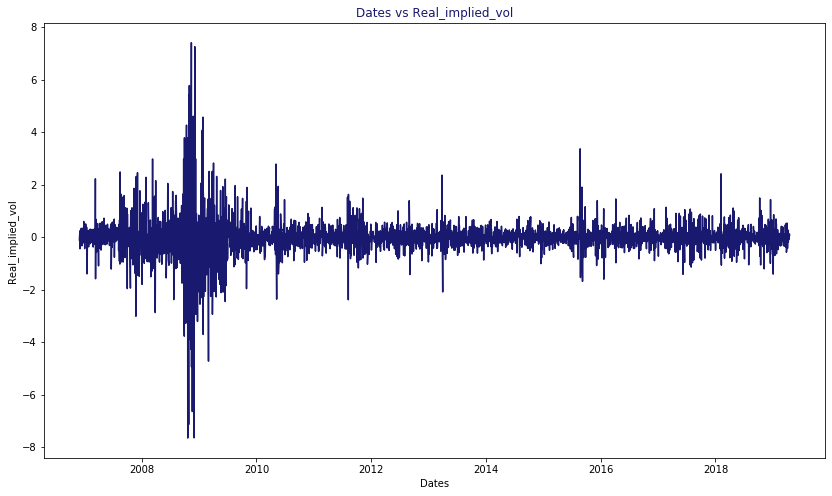

In [191]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "6M", 120, "Dates", "Real_implied_vol")

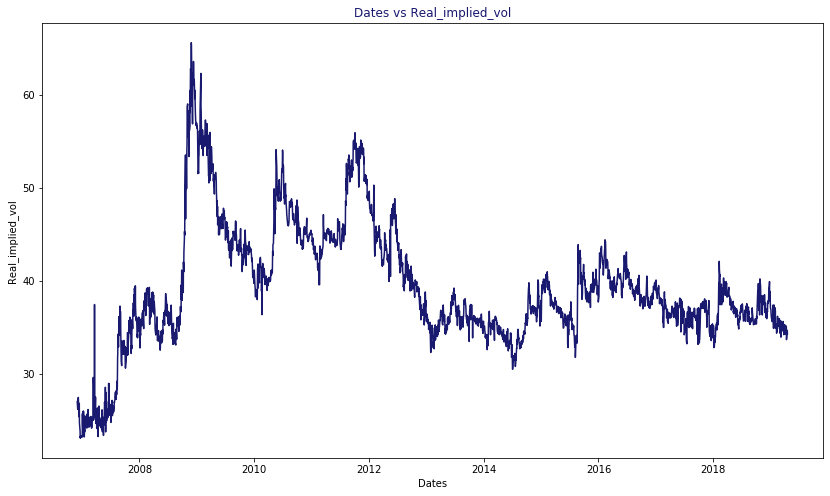

In [192]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "6M", 140, "Dates", "Real_implied_vol")

# Compare different durations 

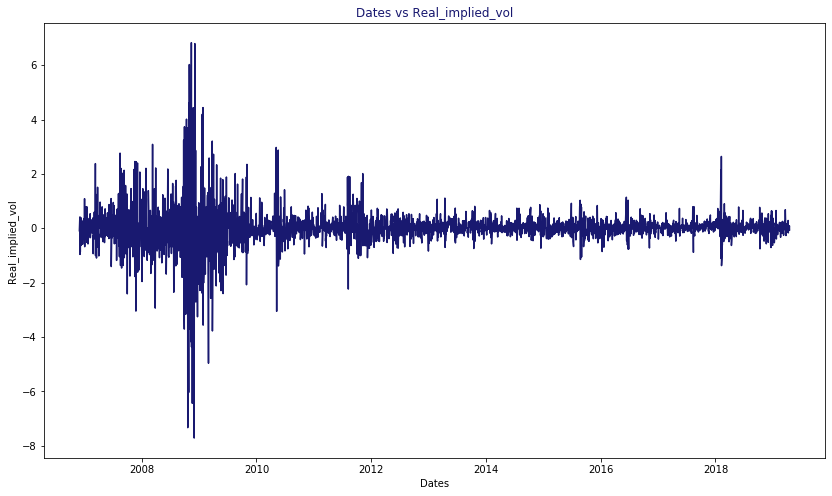

In [198]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "6M", 100, "Dates", "Real_implied_vol")

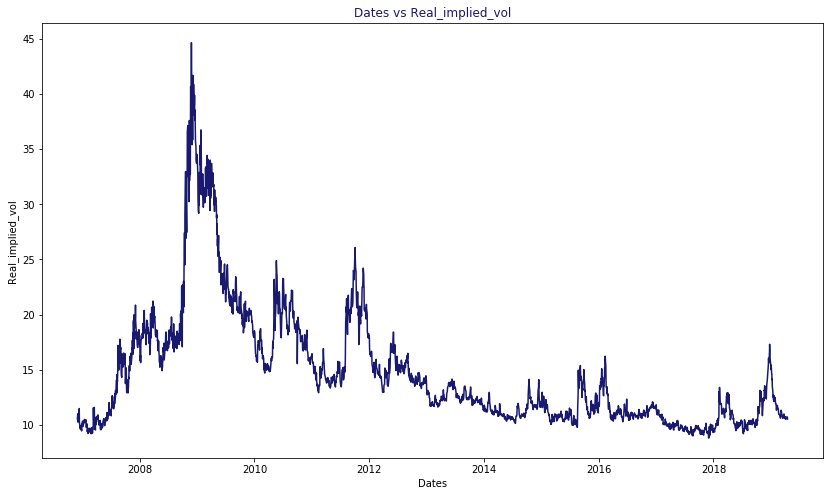

In [202]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "1Y", 100, "Dates", "Real_implied_vol")

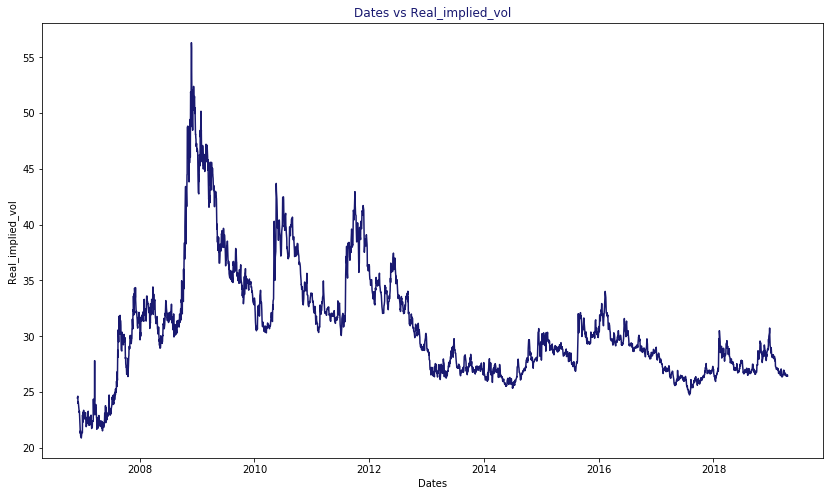

In [203]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "18M", 100, "Dates", "Real_implied_vol")

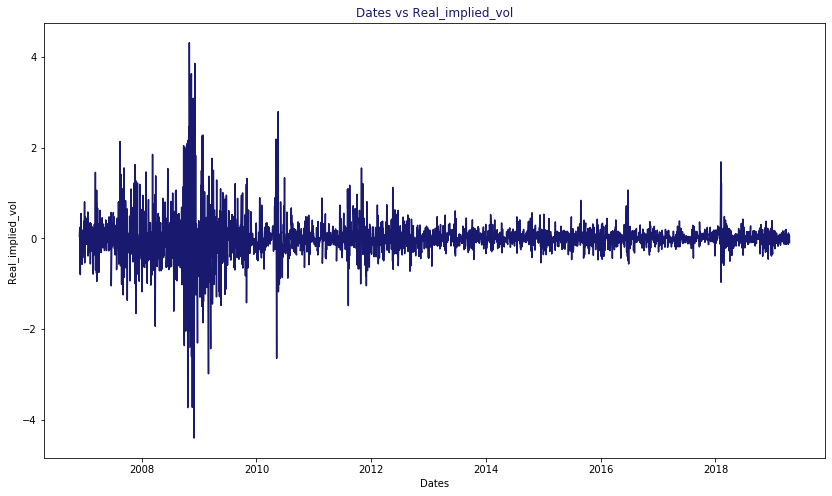

In [204]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "2Y", 100, "Dates", "Real_implied_vol")

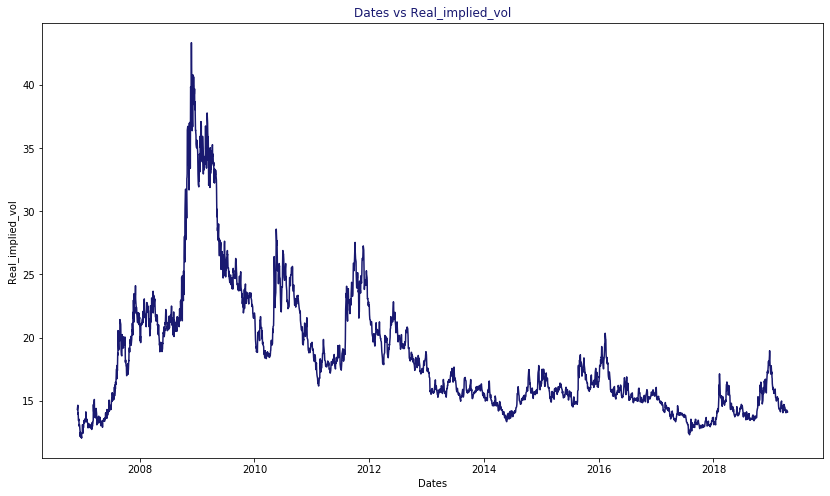

In [205]:
graph_df_strike_duration_selection(spots_iv_index_spx_ai_daily, "3Y", 100, "Dates", "Real_implied_vol")

In [ ]:
def single_graph(df, x_col, y_col):
    title = f'{x_col} vs {y_col}'
    plt.figure(figsize=(14, 8))

    params = {"text.color": "midnightblue",
              "xtick.color": "black",
              "ytick.color": "black"}
    plt.rcParams.update(params)

    plt.plot(df[x_col], df[y_col], 'midnightblue')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)

    plt.show()
    return

## Plot same duration options with different strike values 

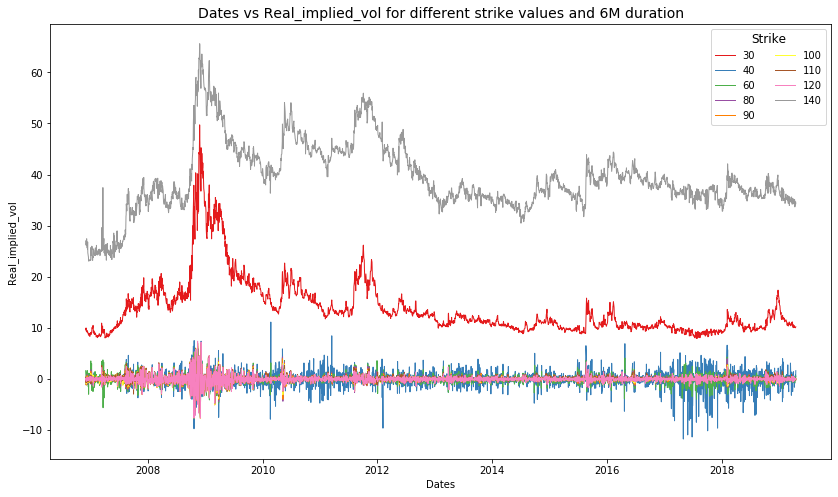

In [289]:
from implied_vol_prediction.src.graphs import plot_different_strike_values

plot_different_strike_values(spots_iv_index_spx_ai_daily, "6M", "Dates", "Real_implied_vol")

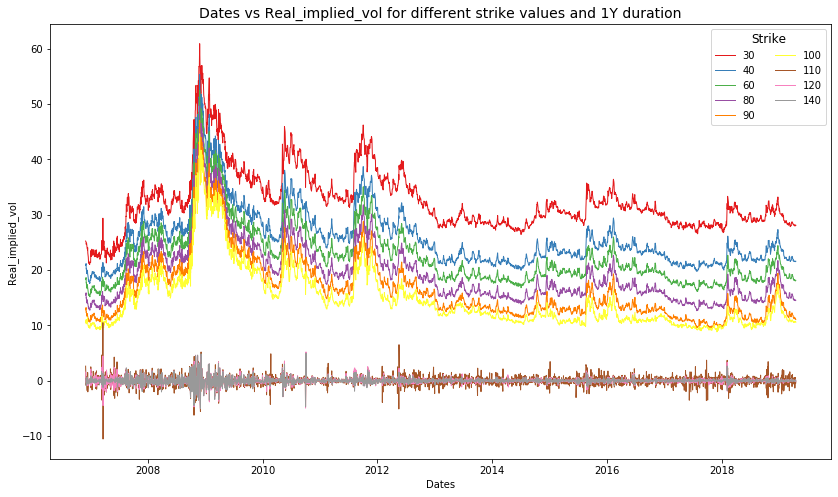

In [281]:
plot_different_strike_values(spots_iv_index_spx_ai_daily, "1Y", "Dates", "Real_implied_vol")

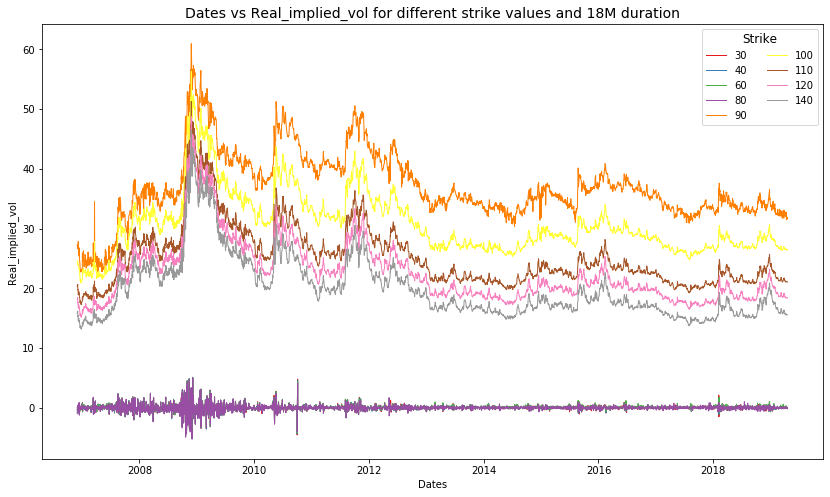

In [282]:
plot_different_strike_values(spots_iv_index_spx_ai_daily, "18M", "Dates", "Real_implied_vol")

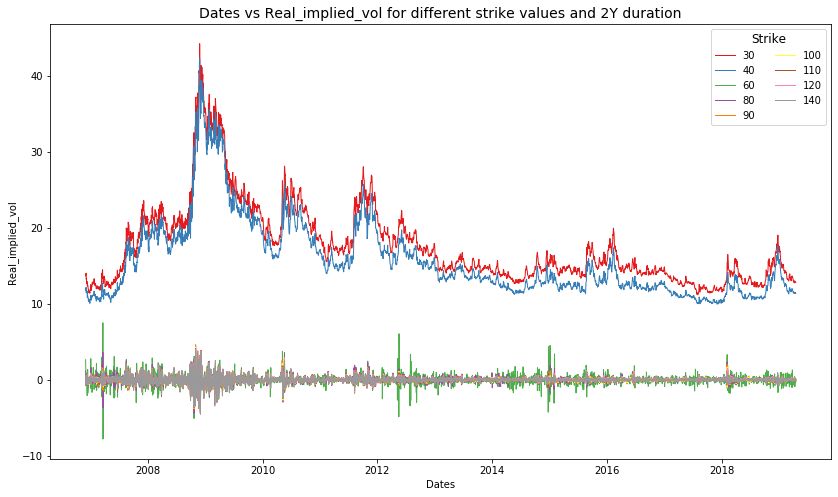

In [283]:
plot_different_strike_values(spots_iv_index_spx_ai_daily, "2Y", "Dates", "Real_implied_vol")

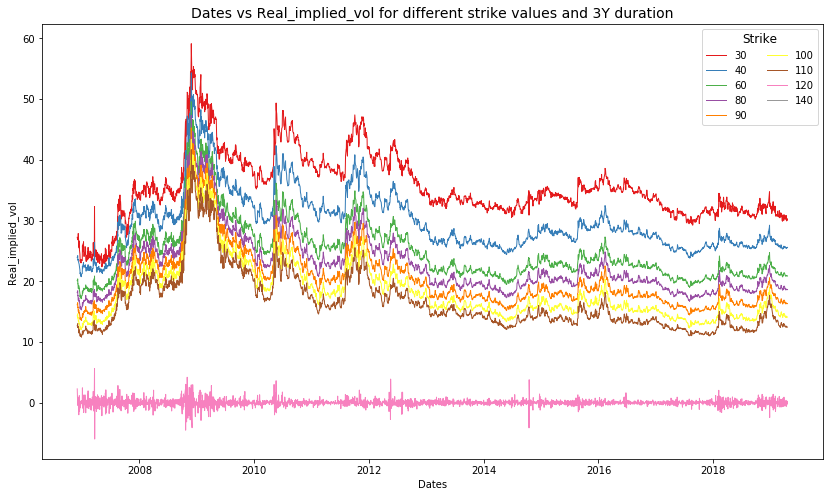

In [284]:
plot_different_strike_values(spots_iv_index_spx_ai_daily, "3Y", "Dates", "Real_implied_vol")

# Plot same strike options for different duration 

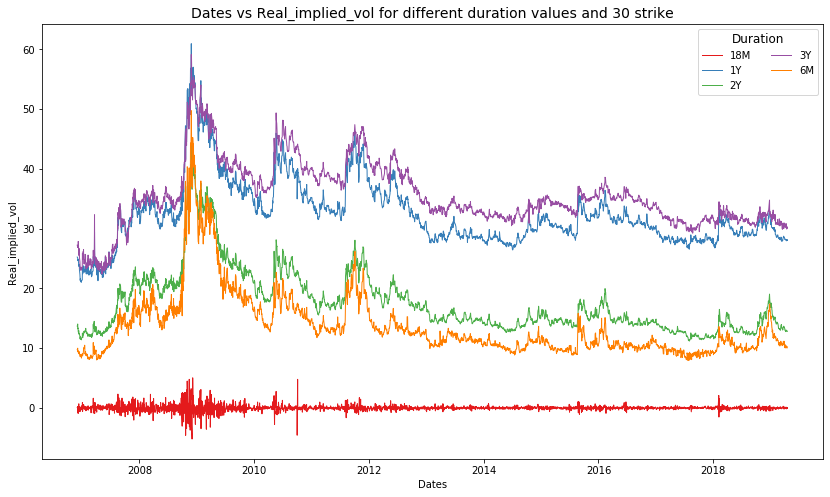

In [294]:
from implied_vol_prediction.src.graphs import plot_different_duration_values

plot_different_duration_values(spots_iv_index_spx_ai_daily, 30, "Dates", "Real_implied_vol")

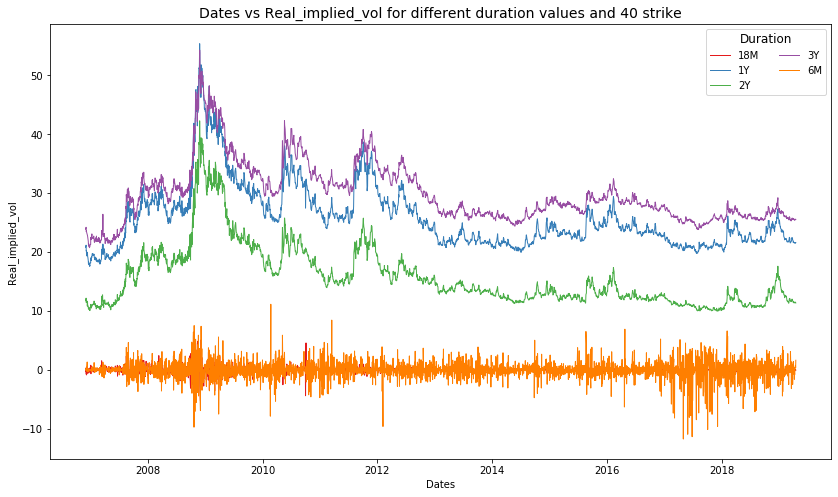

In [295]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 40, "Dates", "Real_implied_vol")

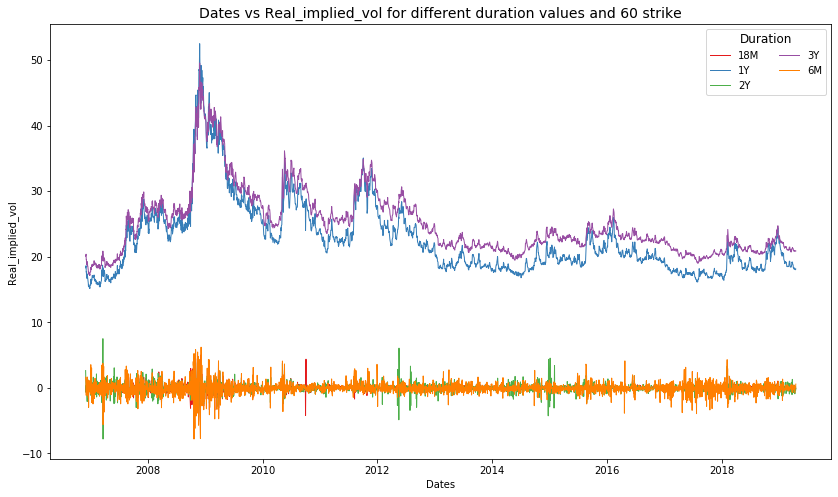

In [296]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 60, "Dates", "Real_implied_vol")

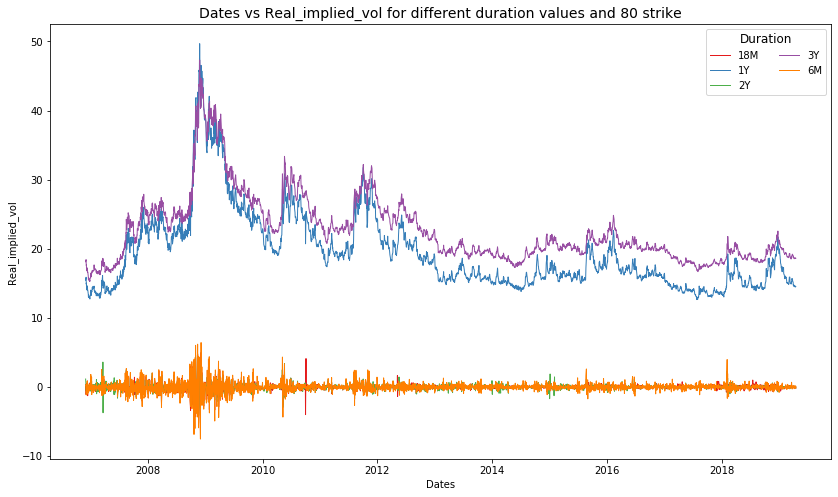

In [297]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 80, "Dates", "Real_implied_vol")

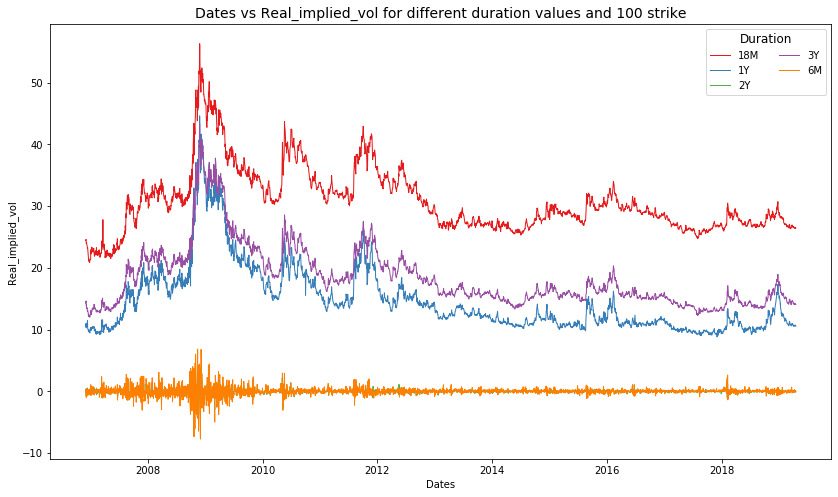

In [298]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 100, "Dates", "Real_implied_vol")

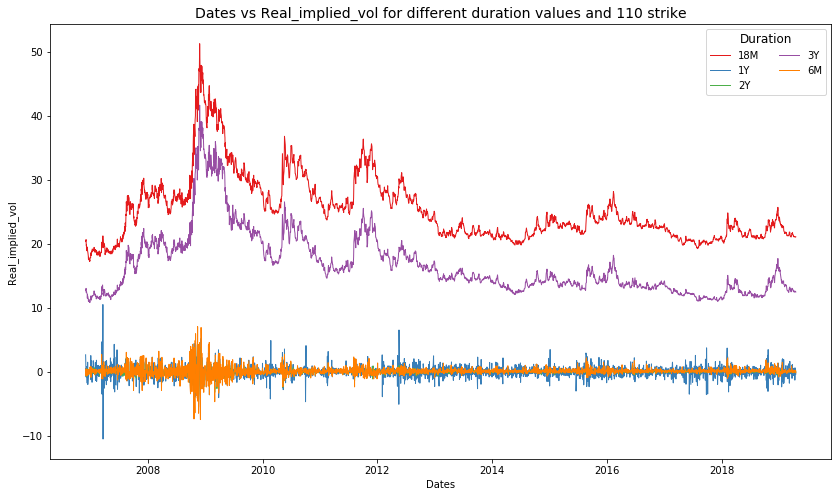

In [299]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 110, "Dates", "Real_implied_vol")

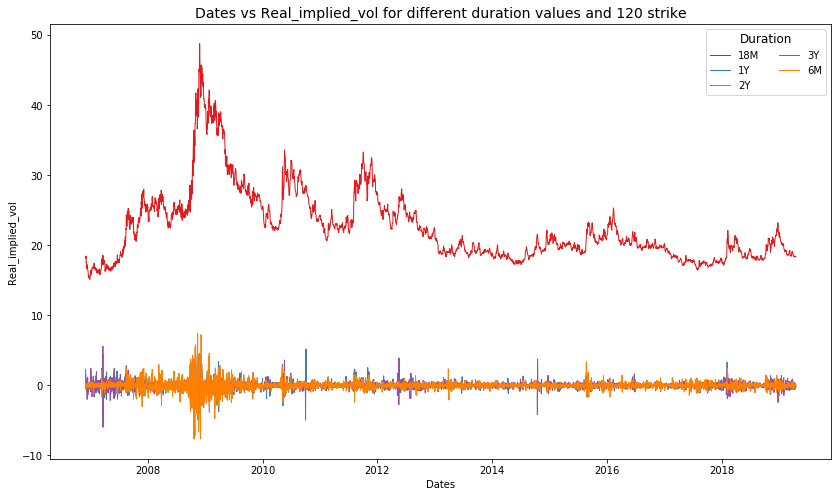

In [300]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 120, "Dates", "Real_implied_vol")

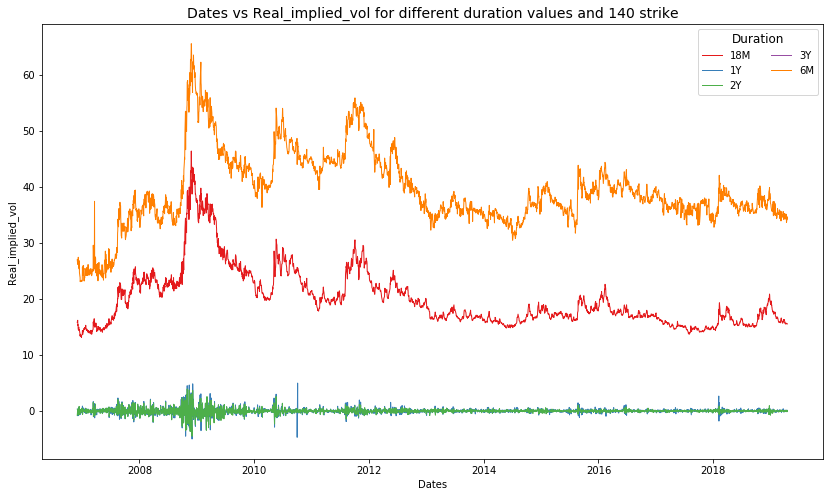

In [302]:
plot_different_duration_values(spots_iv_index_spx_ai_daily, 140, "Dates", "Real_implied_vol")

# Cross correlation tables 